<a href="https://colab.research.google.com/github/Chryron/CSC2516_NN-DL/blob/main/CSC2516_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Logistic Regression for Binary Classification (2 points)

In softmax regression, the model's output probabilities are given by

$$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1. Show that this parametrization has a spurious degree of freedom. That is, show that both $\mathbf{o}$ and $\mathbf{o} + c$ with $c \in \mathbb{R}$ lead to the same probability estimate.

2. For binary classification, i.e. whenever we have only two classes $\{-1, 1\}$, we can arbitrarily set $o_{-1} = 0$. Using the shorthand $o = o_1$ show that this is equivalent to

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}$$

3. Show that the log-likelihood loss (often called logistic loss) for labels $y \in \{-1, 1\}$ is thus given by

$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

4. Show that for $y = 1$ the logistic loss asymptotes to $0$ for $o \to \infty$ and to $\infty$ for $o \to -\infty$.

1.
$$
\begin{align*}
p(y|\mathbf{o}+c) = \mathrm{softmax}(\mathbf{o}+c)_y &= \frac{\exp{(o_y+c)}}{\sum_{y'}\exp{(o_{y'}+c)}} \\ 
&= \frac{\exp{(o_y)}\exp{(c)}}{\exp{(c)}\sum_{y'}\exp{(o_{y'})}} \\ 
&= \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}
\end{align*}
$$
2.
$$
\begin{align*}
p(y=1|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_1 &= \frac{\exp{(o_1)}}{\sum_{y'}\exp{(o_{y'})}} \\ 
&= \frac{\exp{(o_1)}}{\exp{(o_1)}+\exp{(o_{-1})}} \\ 
&= \frac{\exp{(o)}}{\exp{(o)}+\exp{0}} \\ 
&= \frac{\exp{(o)}}{\exp{(o)}+1} \\
&= \frac{1}{1 + \exp(-o)}
\end{align*}
$$
3.
$$
\begin{align*}
p(y=-1|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_{-1} &= \frac{\exp{(o_{-1})}}{\sum_{y'}\exp{(o_{y'})}} \\ 
&= \frac{\exp{(o_{-1})}}{\exp{(o_{-1})}+\exp{(o_{1})}} \\ 
&= \frac{1}{1 + \exp{(o)}} \\ 
\end{align*}
$$
Since $y\in \{-1,1\}$, the expressions for the likelihood can be combined as follows:
$$
\begin{align*}
p(y|o) &= \frac{1}{1+\exp{-y\cdot o}} \\
\therefore -\log p(y|o) &= -\log \frac{1}{1+\exp{(-y\cdot o)}} \\
&= 0 + \log(1+\exp{(-y\cdot o)}) \\ 
&= \log(1+\exp{(-y\cdot o)})
\end{align*}
$$
4.
$$
\begin{align*}
-\log p(y=1|o) &= \log (1 + \exp(-o)) \\ 
\mathrm{as}\  o \to \infty \\ 
&= \log (1 + \exp(-\infty)) \\ 
&= \log (1 + 0) \\ 
&= 0 \\
-\log p(y=1|o) &= \log (1 + \exp(-o)) \\ 
\mathrm{as}\  o \to -\infty \\ 
&= \log (1 + \exp(\infty)) \\ 
&= \log(\infty) \\ 
&= \infty
\end{align*}
$$




# 2. Implementing the logistic loss (1.5 points)

1. Implement the binary logistic loss $l(y,o) = \log (1 + \exp(-y \cdot o))$ in numpy.
1. Plot its values for $y \in \{-1, 1\}$ over the range of $o \in [-5, 5]$.
1. Derive the derivative of $l(y,o)$ and show your work. Then, in a new plot, plot derivative of $l(y,o)$ with respect to $o$ for $y \in \{-1, 1\}$ and for $o \in [-5, 5]$ without using any automatic differentiation software (e.g. Pytorch, TensorFlow, JAX, etc.).
1. In a new plot, plot $l(y,o)$ with $y = 1$ and $o ∈ [-1000, 1000]$. What happens for large positive and large negative values of $o$? Why?

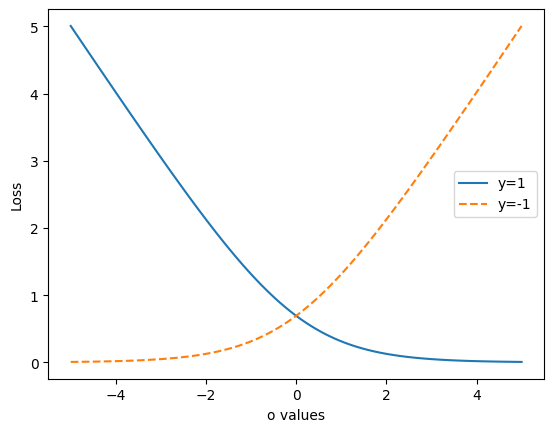

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def binary_logistic_loss(y, o):
    return np.log(1 + np.exp(-y*o))

o = np.linspace(-5,5,100)
loss_1 =  binary_logistic_loss(1, o)
loss_neg1 = binary_logistic_loss(-1, o)

plt.plot(o, loss_1, label="y=1")
plt.plot(o, loss_neg1, label="y=-1", linestyle='--')
plt.xlabel("o values")
plt.ylabel("Loss")
plt.legend()
plt.show()

$$
\begin{align*}
l &= \log u \\ 
u &= 1 + \exp(-y\cdot o) \\
\frac{dl}{du} &= \frac{1}{u} \\ 
\frac{du}{do} &= - y\exp(-y\cdot o) \\ 
\frac{dl(y,o)}{do} &= \frac{- y\exp(-y\cdot o)}{1 + \exp(-y\cdot o)}
\end{align*}
$$

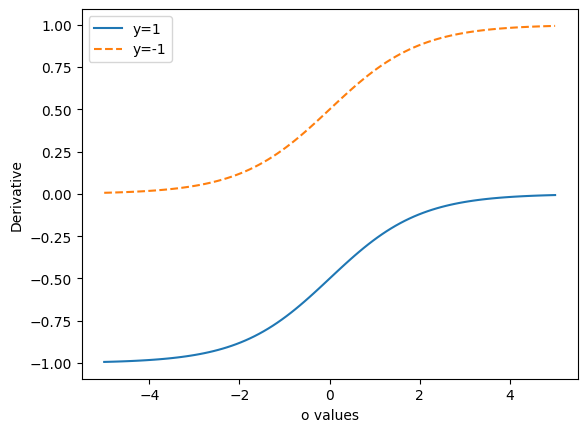

In [9]:
def loss_derivative(y, o):
    return (-y*np.exp(-y*o))/(1+np.exp(-y*o))
    
derivative_1 = loss_derivative(1, o)
derivative_neg1 = loss_derivative(-1, o)

plt.plot(o, derivative_1, label="y=1")
plt.plot(o, derivative_neg1, label="y=-1", linestyle='--')
plt.xlabel("o values")
plt.ylabel("Derivative")
plt.legend()
plt.show()

/tmp/ipykernel_521063/1698967516.py:5: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(-y * o))


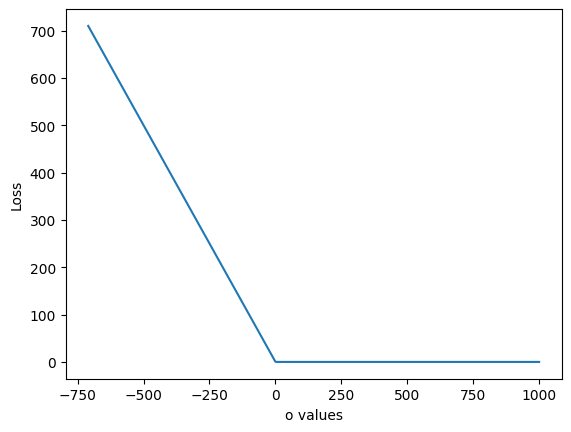

In [11]:
o = np.linspace(-1000,1000,10000)
loss_1 =  binary_logistic_loss(1, o)

plt.plot(o, loss_1)
plt.xlabel("o values")
plt.ylabel("Loss")
plt.show()

As $o\to\infty$ (or for large positive values), the loss stays 0, since the predicted value $\hat{y}=1$ is correct and confident. As $o\to-\infty$ (or for large negative values), the loss increases linearly with $o$, since the predicted value $\hat{y}=-1$ is incorrect but confident. This also follows mathematically from the asymptotes derived in question 1, part 4.

# 3. Implementing logistic regression (1.5 points)

Implement a basic logistic regression model and fit it to the data from the new `generate_data` function (below) using gradient descent.
Your model should take the form `o = m*x + b`, where `o` is the output (logits), `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
Train the model using the logistic loss function you derived in the previous problem.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
Print out or plot the loss over the course of training.
You should be able to get a loss that is close to zero by the end of training - make sure you achieve this and **explain why**.

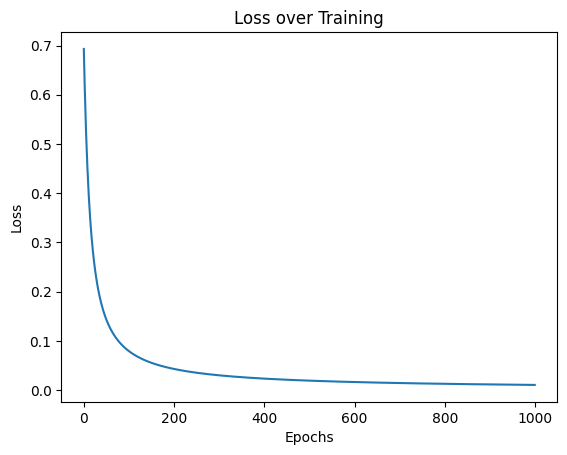

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data():
    size = 1000
    rng = np.random.default_rng(seed=0)
    y = 2*rng.integers(0, 2, size) - 1
    x = rng.standard_normal((1000,)) + 4*y
    return x, y

def binary_logistic_loss(y, o):
    return np.log(1 + np.exp(-y*o))

def derivative_binary_logistic_loss(y, o):
    return (-y * np.exp(-y * o)) / (1 + np.exp(-y * o))

def train(x, y, lr=0.01, epochs=1000):
    m, b = 0.0, 0.0  # Initialize parameters
    losses = []

    for epoch in range(epochs):
        o = m * x + b
        loss = np.mean(binary_logistic_loss(y, o))
        losses.append(loss)

        # Compute gradients
        dL_do = derivative_binary_logistic_loss(y, o)
        dL_dm = np.mean(dL_do * x)
        dL_db = np.mean(dL_do)

        # Update parameters
        m -= lr * dL_dm
        b -= lr * dL_db

    return m, b, losses

x, y = generate_data()
m, b, losses = train(x, y)

plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Training')
plt.show()



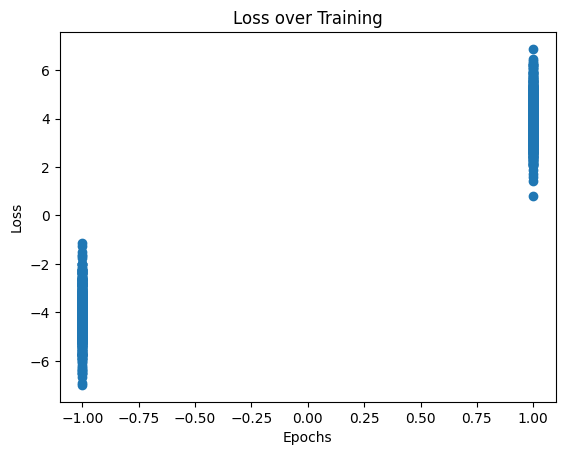

In [18]:
plt.scatter(y,x)
plt.xlabel('x')
plt.ylabel('y, class')
plt.title('Distribution of generated data')
plt.show()

The data is linearly separable, therefore the loss should approach zero as the model trains. The data is generated in a way that there's a clear linear relationship between x and y (with y values being shifted by 4 units based on their class). The logistic regression model is trying to find this linear boundary. As the model gets better at finding this boundary, the predictions become more confident and correct, leading to a reduced loss.